# 2-segmentation

In [1]:
import os
import cv2
from matplotlib import pyplot as plt
from cv2 import imread
import numpy as np

In [2]:
data_path = fr'C:\Users\hamid\Desktop\1st_phase\Data'

In [3]:
include={'Plates'}
segdata=dict()
segdata['data']=[]
for subdir in os.listdir(data_path):
        if subdir in include:
            print(subdir)
            current_path = os.path.join(data_path, subdir) 
            for file in os.listdir(current_path):
                if file[-3:] in {'jpg', 'png'}:
                    im = imread(os.path.join(current_path, file))
                    segdata['data'].append(im)

Plates


In [4]:
segdata

{'data': [array([[[202, 202, 202],
          [171, 171, 171],
          [140, 140, 140],
          ...,
          [184, 184, 184],
          [175, 175, 175],
          [152, 152, 152]],
  
         [[202, 202, 202],
          [155, 155, 155],
          [112, 112, 112],
          ...,
          [192, 192, 192],
          [187, 187, 187],
          [164, 164, 164]],
  
         [[202, 202, 202],
          [145, 145, 145],
          [ 94,  94,  94],
          ...,
          [190, 190, 190],
          [193, 193, 193],
          [170, 170, 170]],
  
         ...,
  
         [[ 50,  50,  50],
          [ 53,  53,  53],
          [ 68,  68,  68],
          ...,
          [112, 112, 112],
          [ 84,  84,  84],
          [ 65,  65,  65]],
  
         [[ 38,  38,  38],
          [ 50,  50,  50],
          [ 71,  71,  71],
          ...,
          [ 63,  63,  63],
          [ 47,  47,  47],
          [ 38,  38,  38]],
  
         [[ 31,  31,  31],
          [ 45,  45,  45],
          [ 62, 

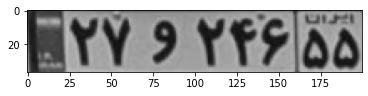

In [5]:
plt.imshow(segdata['data'][6])

In [6]:
segimage=[]
for i in range(len(segdata['data'])):
    segimage.append(segdata['data'][i])

# histogram and threasholding

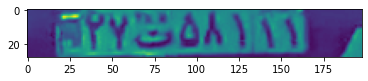

In [7]:
for i in range(len(segimage)):
    segimage[i]=cv2.cvtColor(segimage[i], cv2.COLOR_BGR2RGB)
    segimage[i]= cv2.cvtColor(segimage[i], cv2.COLOR_BGR2GRAY)
plt.imshow(segimage[4])

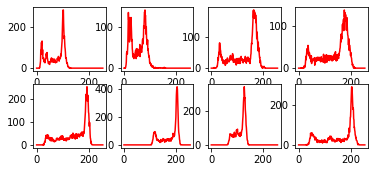

In [8]:
sampel=[4,7,8,11,12,15,3,9]
j=341
for i in range(len(segimage)):
    if i in sampel:
        hist=cv2.calcHist([segimage[i]],[0],None,[256],[0,256])
        plt.subplot(j),plt.plot(hist,color = "r")
        j=j+1

In [9]:
def thresh_segmentation(img_gray,threshold):
    ret,img_gray=cv2.threshold(img_gray,threshold,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    return img_gray

In [10]:
img_thresh=[]
for i in range(len(segimage)):
    image=thresh_segmentation(segimage[i],50)
    img_thresh.append(image)           
               

In [11]:
len(img_thresh)

41

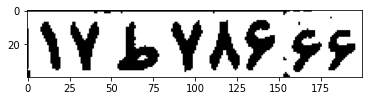

In [12]:
plt.imshow(img_thresh[1],cmap='gray')

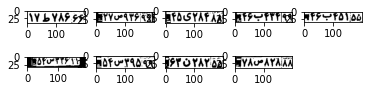

In [13]:
sampel=[3,27,9,12,13,14,15,22,1]
j=551
for i in range(len(segimage)):
    if i in sampel:
        plt.subplot(j),plt.imshow(img_thresh[i],cmap='gray')
        j=j+1


In [14]:
segpath=fr'C:/Users/hamid/Desktop/1st_phase/Data/Segments/'

# segmentation by contour

In [15]:
def segmentation_contour(imgGrayscale,count):
    imgthresh=cv2.adaptiveThreshold(imgGrayscale,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,55,3)
    ctrs, hier = cv2.findContours(imgthresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)    
    sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
    for i in range(len(sorted_ctrs)):
        x, y, w, h = cv2.boundingRect(sorted_ctrs[i])
        roi = imgthresh[y:y + h, x:x + w]
        area = w*h
        if 80 < area < 900  :
            rect = cv2.rectangle(imgthresh, (x, y), (x + w, y + h), (0,255,0), 1)
            cv2.imwrite(segpath +"frame%d.jpg" % count, roi)
            count=count+1
    return rect,count



In [16]:
contour_segmentation=[]
for i in range(len(segimage)):
    imagethresh,count=segmentation_contour(segimage[i],0)
    contour_segmentation.append(imagethresh)
    

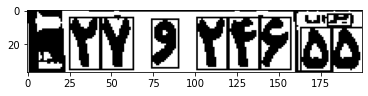

In [17]:
plt.imshow(contour_segmentation[6],cmap='gray')


# Image Segmentation using K-means

In [18]:
def segmentation_kmeans(imgoriginal,k):
    img = cv2.cvtColor(imgoriginal,cv2.COLOR_BGR2RGB)
    twoDimage = img.reshape((-1,3))
    twoDimage = np.float32(twoDimage)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    attempts=10
    ret,label,center=cv2.kmeans(twoDimage,k,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
    center = np.uint8(center)
    res = center[label.flatten()]
    result_image = res.reshape((img.shape))
    return result_image
    
    

In [19]:
kmeans_segmentation=[]
for i in range(len(segimage)):
    result_image=segmentation_kmeans(segimage[i],3)
    kmeans_segmentation.append(result_image)
    


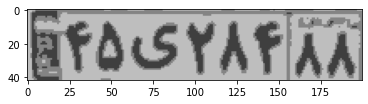

In [20]:
plt.imshow(kmeans_segmentation[9])

# 3-feature Extraction 

In [21]:
include={'Segments'}
seg=dict()
seg['data']=[]
seg['label']=[]
seg['filename']=[]
for subdir in os.listdir(data_path):
        if subdir in include:
            print(subdir)
            current_path = os.path.join(data_path, subdir)

            for file in os.listdir(current_path):
                if file[-3:] in {'jpg', 'png'}:
                    im = imread(os.path.join(current_path, file))
                    seg['data'].append(im)
 
       

Segments


In [22]:
print(len(seg['data']))

415


(29, 29, 3)

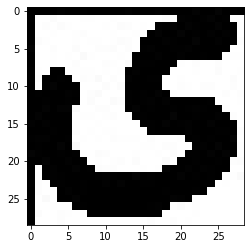

In [23]:
plt.imshow(seg['data'][7])
seg['data'][7].shape

In [24]:
char=[]
for i in range(len(seg['data'])):
    char.append(seg['data'][i])
    
    

# preprocess image 

In [25]:
def preprocess_seg(imgoriginal):
    imgthresh=cv2.cvtColor(imgoriginal, cv2.COLOR_BGR2RGB)
    imgthresh= cv2.cvtColor(imgthresh, cv2.COLOR_BGR2GRAY)
    imgthresh=cv2.adaptiveThreshold(imgthresh,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,55,3)
    return imgthresh

In [26]:
char=[]
for i in range(len(seg['data'])):
    img=preprocess_seg(seg['data'][i])
    char.append(img)
    
    

(34, 19)

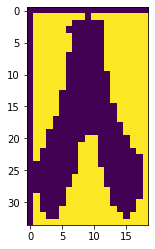

In [27]:
plt.imshow(char[9])
char[9].shape

# feature Extraction black and white

In [28]:
def feature_black_white(imgthresh):
    h,w=imgthresh.shape
    featurevector=np.reshape(imgthresh,(1,h*w))
    return featurevector
    

In [29]:
featurevector_black_white=[]
for i in range(len(char)):
    featurevector=feature_black_white(char[i])
    featurevector_black_white.append(featurevector)
    

In [30]:
print(len(featurevector_black_white[4][0]))

210


In [31]:
featurevector_black_white[2][0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255,
         0, 255, 255,   0, 255, 255, 255, 255, 255,   0,   0,   0, 255,
       255, 255, 255, 255,   0,   0, 255,   0,   0,   0, 255, 255, 255,
       255, 255,   0,   0, 255,   0,   0,   0,   0, 255, 255, 255, 255,
         0,   0, 255,   0, 255,   0,   0,   0,   0,   0,   0,   0,   0,
       255,   0, 255,   0,   0,   0,   0,   0,   0,   0, 255, 255,   0,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255], dtype=uint8)

# feature Extaction LBP

In [32]:
def get_pixel(img, center, x, y):  
    value = 0
    try:
        if img[x][y] >= center:
            value = 1       
    except:
        pass
    return value

In [33]:
def lbp_calculated_pixel(img, x, y):
    center = img[x][y]
    val_ar = []

    # top_left
    val_ar.append(get_pixel(img, center, x-1, y-1))
    # top
    val_ar.append(get_pixel(img, center, x-1, y)) 
    # top_right
    val_ar.append(get_pixel(img, center, x-1, y + 1))
    # right
    val_ar.append(get_pixel(img, center, x, y + 1))
    # bottom_right
    val_ar.append(get_pixel(img, center, x + 1, y + 1))
    # bottom
    val_ar.append(get_pixel(img, center, x + 1, y)) 
    # bottom_left
    val_ar.append(get_pixel(img, center, x + 1, y-1))
    # left
    val_ar.append(get_pixel(img, center, x, y-1))
    
    # convert binary values to decimal
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
    val = 0
    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]     
    return val


In [34]:

lbp=[]
for i in range(len(seg['data'])):
    height, width, _ = seg['data'][i].shape
    img_gray = cv2.cvtColor(seg['data'][i],cv2.COLOR_BGR2GRAY)
    imglbp= np.zeros((height, width),np.uint8)
    for j in range(0, height):
        for k in range(0, width):
            imglbp[j, k] = lbp_calculated_pixel(img_gray, j, k)
    lbp.append(imglbp)    

                    

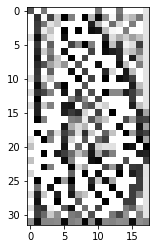

In [35]:
plt.imshow(lbp[6],cmap='gray')

In [36]:
featurevector_lbp=[]
for i in range(len(lbp)):
    h,w=lbp[i].shape
    featurevector=np.reshape(lbp[i],(1,h*w))
    featurevector_lbp.append(featurevector)
print(len(featurevector_lbp))    

415


In [37]:
len(featurevector_lbp[1][0])

660

In [38]:
lbp

[array([[ 85, 255, 255, 119, 255, 255, 255,  87, 255, 255, 255, 127, 247,
         255, 119, 255, 255, 255, 227],
        [255,  16, 184, 112, 232,  64, 128, 255,  25,  24, 160, 240, 248,
         112, 248,  88, 184, 248, 224],
        [221,  62, 125, 234, 197, 255,  99, 255, 255,  47,   3, 155,  40,
         200, 148, 254, 127, 255, 227],
        [255,  44, 206, 135, 255,  45,  80, 255, 255,   4, 255, 255,  22,
         191, 127,  93, 190, 255, 227],
        [221,  38, 199, 255, 255,   0, 255,   0, 255,  82, 255,  68, 158,
          41, 212, 191, 127, 255, 227],
        [255,  34, 203,  17, 255, 255,  37, 255,   1, 255,   4, 255, 255,
          22, 255,  93, 190, 255, 227],
        [255,   2, 255, 255,   1, 255,   0, 255, 255, 255, 255,  89, 188,
          62,  85, 190, 127, 255, 227],
        [205,   2, 255,   4, 255,  53, 255,   1, 144, 255,  64, 255,  31,
          52, 254, 125, 254, 255, 227],
        [255, 255, 255, 255, 255,  80, 181, 255, 255,  16, 255, 255, 255,
          10, 

In [39]:
featurevector_lbp[3][0]

array([255,  54, 255, 119, 255, 255, 119, 255, 255, 255, 255, 119, 255,
       119, 255, 119, 255, 227, 255,  56, 240, 248, 120, 224, 192, 128,
       255,  16, 176, 248,  80, 248,  96, 248,  56, 224, 255,  46, 203,
       141, 158, 163, 255, 255, 255,  94,  25, 164, 250,  45, 210, 189,
       126, 227, 255,  22, 255, 255, 111,  67, 193, 255,   0, 255,  46,
        83, 191,  70, 255,  61, 254, 227, 221,  26,  57, 232, 212, 163,
       255,  85, 255, 255,  20, 255, 117, 243, 253,  94, 191, 227, 255,
        62,  94, 183, 239,  65, 149, 255, 105,  92,  62,  77, 154, 169,
       212, 255, 127, 227, 221,  36, 255,  43, 197, 255, 255,   8,   0,
       255,  20, 254, 239,  71, 187,  61, 254, 227, 255,  18, 189, 102,
       227, 225, 255, 255, 255,  13,  30,  57, 244, 255, 127,  62, 255,
       227, 221,  62,  93, 178, 227, 193, 255,   0, 255, 255, 255,  46,
       219, 177, 238,  94, 191, 227, 255,   4, 142,  11, 129, 255, 255,
       255,  97, 255,  12,  22, 191,  91, 181, 255, 127, 227, 25

#  Corner Detector feature Extraction harris

In [40]:
def feature_corner_harris(imgoriginal):
    img_gray= cv2.cvtColor(imgoriginal, cv2.COLOR_BGR2GRAY)
    img_gray = np.float32(img_gray)
    dst = cv2.cornerHarris(img_gray,2,3,0.1)
    imgoriginal[dst>0.005*dst.max()]=[0,0,255]
    h,w,c= imgoriginal.shape
    featurevector=np.reshape(imgoriginal,(1,h*w*c))
    return featurevector,imgoriginal     

In [41]:
featurevector_corner_harris=[]
img_corner_harris=[]
for i in range(len(seg['data'])):
    featurevector,img=feature_corner_harris(seg['data'][i])
    featurevector_corner_harris.append(featurevector)
    img_corner_harris.append(img)
    

In [42]:
featurevector_corner_harris[2][0]

array([  0,   0,   0,   0,   0,   0,   1,   1,   1,   0,   0,   0,   0,
         0, 255,   0,   0, 255,   0,   0, 255,   0,   0, 255,   0,   0,
         0,   0,   0, 255,   0,   0,   0,   0,   0,   0, 255, 255, 255,
         2,   2,   2, 255, 255, 255,   0,   0, 255,   0,   0, 255,   0,
         0, 255,   0,   0, 255, 254, 254, 254,   0,   0, 255, 252, 252,
       252,   0,   0,   0,   1,   1,   1,   0,   0, 255,   0,   0, 255,
         0,   0, 255, 253, 253, 253, 254, 254, 254,   0,   0, 255,   0,
         0, 255,   0,   0, 255,   0,   0, 255,   1,   1,   1,   0,   0,
         0,   0,   0, 255, 255, 255, 255, 251, 251, 251, 255, 255, 255,
       255, 255, 255, 254, 254, 254,   0,   0,   0,   0,   0, 255,   0,
         0, 255,   1,   1,   1,   0,   0,   0,   0,   0, 255,   0,   0,
         0, 253, 253, 253, 255, 255, 255, 255, 255, 255,   0,   0, 255,
         0,   0,   0,   0,   0,   0, 251, 251, 251,   0,   0,   0, 255,
       255, 255,   0,   0, 255,   3,   3,   3,   1,   1,   1,   

In [43]:
len(featurevector_corner_harris[4][0])

630

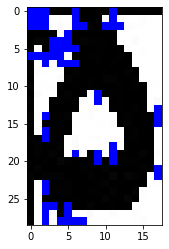

In [44]:
plt.imshow(img_corner_harris[18])

# SIFT feature Extraction 

In [45]:
import cv2
def sift_detect(imgoriginal):
    gray= cv2.cvtColor(imgoriginal,cv2.COLOR_BGR2GRAY)
    sift = cv2.SIFT_create()
    kp = sift.detect(gray,None)
    img=cv2.drawKeypoints(gray,kp,imgoriginal)                         
    return img 
    

In [46]:
def feature_sift(imgoriginal):
    gray= cv2.cvtColor(imgoriginal,cv2.COLOR_BGR2GRAY)
    sift = cv2.SIFT_create()
    kp, desc = sift.detectAndCompute(gray,None)
    a,b=desc.shape
    featurevector=np.reshape(desc,(1,a*128))
    return featurevector
    
    

In [47]:
sift=[]
for i in range(len(seg['data'])):
    img=sift_detect(seg['data'][i])
    sift.append(img)

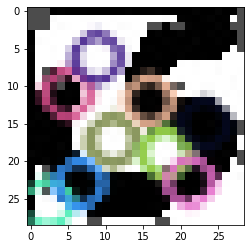

In [48]:
plt.imshow(sift[7])

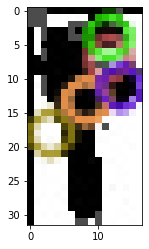

In [49]:
plt.imshow(sift[5])

# feature Extraction DTW

In [50]:
def crope_image_dtw(imgthresh):

    h,w=imgthresh.shape
    
    
    topLeft = imgthresh[0:h//6, 0:w//4]
    topcenter1= imgthresh[0:h//6, w//4:w//2]
    topcenter2 = imgthresh[0:h//6, w//2:(3*w)//4]
    topright = imgthresh[0:h//6, (3*w)//4:w]
    
    
    top2left= imgthresh[h//6:h//3,  0:w//4]
    top2center1= imgthresh[h//6:h//3,w//4:w//2]
    top2center2=imgthresh[h//6:h//3,w//2:(3*w)//4]
    top2right= imgthresh[h//6:h//3, (3*w)//4:w]
    
    center1left= imgthresh[h//3:h//2,0:w//4]
    center1center1= imgthresh[h//3:h//2,w//4:w//2]
    center1center2=imgthresh[h//3:h//2,w//2:(3*w)//4]
    center1right= imgthresh[h//3:h//2, (3*w)//4:w]
    
    center2left= imgthresh[h//2:(2*h)//3,0:w//4]
    center2center1= imgthresh[h//2:(2*h)//3,w//4:w//2]
    center2center2=imgthresh[h//2:2*h//3,w//2:(3*w)//4]
    center2right= imgthresh[h//2:2*h//3, (3*w)//4:w]
    
    bottom1left= imgthresh[2*h//3:5*h//6, 0:w//4]
    bottom1center1= imgthresh[2*h//3:5*h//6,w//4:w//2]
    bottom1center2=imgthresh[2*h//3:5*h//6,w//2:(3*w)//4]
    bottom1right= imgthresh[2*h//3:5*h//6, (3*w)//4:w]
    
    
    bottom2left= imgthresh[5*h//6:h, 0:w//4]
    bottom2center1= imgthresh[5*h//6:h,w//4:w//2]
    bottom2center2=imgthresh[5*h//6:h,w//2:(3*w)//4]
    bottom2right= imgthresh[5*h//6:h, (3*w)//4:w]
    
        
    listof_img_crope=[topLeft,topcenter1,topcenter2,topright,top2left,top2center1,top2center2,top2right,
                     center1left,center1center1,center1center2,center1right,center2left,center2center1,
                     center2center2,center2right,bottom1left,bottom1center1,bottom1center2,bottom1right,
                     bottom2left,bottom2center1,bottom2center2,bottom2right]
    
    return listof_img_crope

In [51]:
dtw=[]
for i in range(len(char)):
    crope=crope_image_dtw(char[i])
    dtw.append(crope)

In [52]:
print(len(dtw[4]))

24


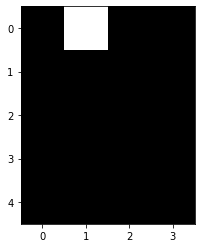

In [53]:
plt.imshow(dtw[6][12],cmap='gray')

In [54]:
dtw[2][4]

array([[  0, 255]], dtype=uint8)

In [55]:
def dis_row(crop):
    h,w=crop.shape
    list_dis_lefttoright=[]
    for i in range (0,h):
        k=0
        o=[]
        for j in range(0,w):
            if crop[i,j]==0:
                list_dis_lefttoright.append(k)  
                break
            else:
                k=k+1
    h,w=crop.shape            
    list_dis_righttoleft =[]            
    for a in range (0,h):
        l=0
        
        for p in range(w-1,-1,-1):
            if crop[a,p]==0:
                list_dis_righttoleft.append(l)
                break
            else:
                l=l+1
             
              
    return  list_dis_lefttoright,list_dis_righttoleft        
    

In [56]:
def dis_col(crop):
    h,w=crop.shape
    list_dis_toptobottom=[]
    for i in range (0,w):
        k=0
        o=[]
        for j in range(0,h):
            if crop[j,i]==0:
                list_dis_toptobottom.append(k)  
                break
            else:
                k=k+1
    h,w=crop.shape            
    list_dis_bottomtotop =[]            
    for a in range (0,w):
        l=0
        
        for p in range(h-1,-1,-1):
            if crop[p,a]==0:
                list_dis_bottomtotop.append(l)
                break
            else:
                l=l+1
             
              
    return  list_dis_toptobottom,list_dis_bottomtotop        
     

In [57]:
def max_min_row(list_ltr,list_rtl):
    if len(list_ltr)==0 or len(list_rtl)==0:
        return 0,0
        
    max_ltr=max(list_ltr)         
    min_ltr=min(list_ltr) 
    max_rtl=max(list_rtl)
    min_rtl=min(list_rtl)
    
            
    if max_rtl>max_ltr:
        final_max=max_rtl
    else:
        final_max=max_ltr
        
    if min_rtl>min_ltr:
        final_min=min_rtl
    else:
        final_min=min_ltr
     
    return final_max,final_min

In [58]:
a,b=dis_row(dtw[9][12])
b

[3, 3, 0, 0, 0]

In [59]:
f,g=dis_col(dtw[1][12])
g

[0, 5, 4, 3]

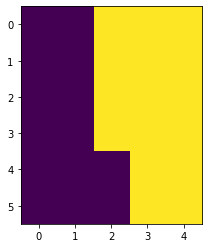

In [60]:
plt.imshow(dtw[8][14])

In [61]:
s=max_min_row(a,b)
t=[]
t.append(s)
print(t)

[(3, 0)]


In [62]:
featurevector_dtw=[]
for i in range(len(dtw)):
    list1=[]
    for x in range(len(dtw[i])):
        a=[]
        list_row_ltr,list_row_rtl=dis_row(dtw[i][x])
        max_min=max_min_row(list_row_ltr,list_row_rtl)
        a.append(max_min)
        list_col_ltr,list_col_rtl=dis_col(dtw[i][x])
        max_minn=max_min_row(list_col_ltr,list_col_rtl)
        a.append(max_minn)
        list1.append(a)
    featurevector_dtw.append(list1)    
        
        
        
    

In [63]:
len(featurevector_dtw[1])

24

# feature Extraction with transfering pixel black to white and white to black

# feature Extraction ARR

In [64]:
def crope_image(imgthresh):

    h,w=imgthresh.shape
    topLeft = imgthresh[0:h//4, 0:w//3]
    topcenter= imgthresh[0:h//4, w//3:(2*w)//3]
    topright = imgthresh[0:h//4, (2*w)//3:w]
    
    
    center1left= imgthresh[h//4:h//2, 0:w//3]
    center1center= imgthresh[h//4:h//2,w//3:(2*w)//3]
    center1right= imgthresh[h//4:h//2, (2*w)//3:w]
    
    center2left= imgthresh[h//2:(3*h)//4, 0:w//3]
    center2center= imgthresh[h//2:(3*h)//4,w//3:(2*w)//3]
    center2right= imgthresh[h//2:(3*h)//4,(2*w)//3:w]
    
    bottomleft= imgthresh[(3*h)//4:h,0:w//3]
    bottomcenter= imgthresh[(3*h)//4:h,w//3:(2*w)//3]
    bottomright= imgthresh[(3*h)//4:h,(2*w)//3:w]
    
    listof_img_crope=[topLeft,topcenter,topright,center1left,center1center,center1right,center2left,center2center,center2right,bottomleft, bottomcenter,bottomright]
    
    return listof_img_crope

In [65]:
featurevector_arr=[]
img_arr=[]
for i in range(len(char)):
    listt=[]
    imgg=[]
    listof_img_crope=crope_image(char[i])
    for j in range(len(listof_img_crope)):
        featurevector=feature_black_white(listof_img_crope[j])
        listt.append(featurevector)
        imgg.append(listof_img_crope[j])
    featurevector_arr.append(listt)
    img_arr.append(imgg)

In [66]:
len(featurevector_arr[4])

12

In [67]:
featurevector_arr[94]

[array([[  0,   0,   0,   0,   0,   0,   0, 255, 255, 255, 255, 255,   0,
         255, 255, 255, 255, 255,   0, 255, 255, 255, 255,   0,   0, 255,
         255, 255, 255,   0,   0, 255, 255, 255, 255,   0,   0, 255, 255,
         255, 255,   0]], dtype=uint8),
 array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255,   0,
           0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0]], dtype=uint8),
 array([[  0,   0,   0,   0,   0,   0,   0, 255, 255, 255, 255, 255, 255,
         255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
         255, 255,   0, 255, 255, 255, 255, 255, 255,   0, 255, 255, 255,
         255, 255, 255,   0,   0, 255, 255, 255, 255, 255]], dtype=uint8),
 array([[  0, 255, 255, 255, 255,   0,   0, 255, 255, 255, 255,   0,   0,
         255, 255, 255, 255,   0,   0, 255, 255, 255,   0,   0,   0, 255,
         255,   0,   0,   0,   

In [68]:
def calculation_black_pixel(listt):
    h=0
    m=0
    for s in listt[0]:
        if s==0:
            h=h+1
    return h
        

In [69]:
final_featurevector_arr=[]
for i in range(len(featurevector_arr)):
    li=[]
    for j in range(len(featurevector_arr[i])):
        pixel=calculation_black_pixel(featurevector_arr[i][j])
        h,w=img_arr[i][j].shape
        if h==0:
            h=1
        if w==0:
            w=1    
        division=pixel/(h*w)
        li.append(division)
    final_featurevector_arr.append(li)    
        
        

In [70]:
len(final_featurevector_arr[20])

12

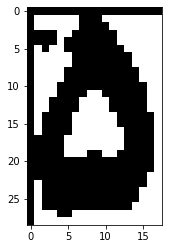

In [71]:
plt.imshow(char[18],cmap='gray')

# persian train

In [72]:
data_path = fr'C:\Users\hamid\Desktop\1st_phase\Data\Persion_train'
include={'0','1','2','3','4','5','6','7','8','9','A','B','C','D','H','J','K','L','M','N','Q','S','T','V','X','Y','Z'}
base_name = 'Persion_train'
os.listdir(data_path)

['0',
 '1',
 '2',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'A',
 'B',
 'C',
 'D',
 'H',
 'J',
 'K',
 'L',
 'M',
 'N',
 'Q',
 'S',
 'T',
 'V',
 'X',
 'Y',
 'Z']

# 4-classification

In [73]:
import joblib
import os
from cv2 import imread
from cv2 import resize
 
def resize_all(src, pklname, include, width=150, height=None):
    """
    load images from path, resize them and write them as arrays to a dictionary, 
    together with labels and metadata. The dictionary is written to a pickle file 
    named '{pklname}_{width}x{height}px.pkl'.
     
    Parameter
    ---------
    src: str
        path to data
    pklname: str
        path to output file
    width: int
        target width of the image in pixels
    include: set[str]
        set containing str
    """
     
    height = height if height is not None else width
     
    data = dict()
    data['description'] = 'resized ({0}x{1})animal images in rgb'.format(int(width), int(height))
    data['label'] = []
    data['filename'] = []
    data['data'] = []   
    data['feature']=[]
     
    pklname = f"{pklname}_{width}x{height}px.pkl"
 
    # read all images in PATH, resize and write to DESTINATION_PATH
    for subdir in os.listdir(src):
        
        print(subdir)
        current_path = os.path.join(src, subdir)
 
        for file in os.listdir(current_path):
            if file[-3:] in {'jpg', 'png'}:
                im = imread(os.path.join(current_path, file))
                im = resize(im, (width, height)) #[:,:,::-1]
                data['label'].append(subdir)
                data['filename'].append(file)
                data['data'].append(im)
 
        joblib.dump(data, pklname)

In [74]:
base_name = 'Persion_tran'
width = 80
 
include = {'0','1','2','4','5','6','7','8','9','A','B','C','D','H','J','K','L','M','N','Q','S','T','V','X','Y','Z'}
 
resize_all(src=data_path, pklname=base_name, width=width, include=include)


0
1
2
4
5
6
7
8
9
A
B
C
D
H
J
K
L
M
N
Q
S
T
V
X
Y
Z


In [75]:
from collections import Counter
import numpy as np
data = joblib.load(f'{base_name}_{width}x{width}px.pkl')
 
print('number of samples: ', len(data['data']))
print('keys: ', list(data.keys()))
print('description: ', data['description'])
print('image shape: ', data['data'][0].shape)
print('labels:', np.unique(data['label']))
 
Counter(data['label'])

number of samples:  3438
keys:  ['description', 'label', 'filename', 'data', 'feature']
description:  resized (80x80)animal images in rgb
image shape:  (80, 80, 3)
labels: ['0' '1' '2' '4' '5' '6' '7' '8' '9' 'A' 'B' 'C' 'D' 'H' 'J' 'K' 'L' 'M'
 'N' 'Q' 'S' 'T' 'V' 'X' 'Y' 'Z']


Counter({'0': 103,
         '1': 201,
         '2': 201,
         '4': 201,
         '5': 201,
         '6': 201,
         '7': 201,
         '8': 201,
         '9': 201,
         'A': 104,
         'B': 101,
         'C': 101,
         'D': 101,
         'H': 101,
         'J': 101,
         'K': 101,
         'L': 101,
         'M': 101,
         'N': 101,
         'Q': 101,
         'S': 101,
         'T': 101,
         'V': 101,
         'X': 101,
         'Y': 101,
         'Z': 108})

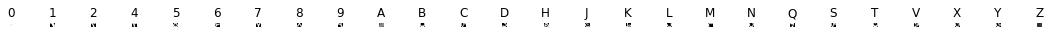

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
# use np.unique to get all unique values in the list of labels
labels = np.unique(data['label'])
 
# set up the matplotlib figure and axes, based on the number of labels
fig, axes = plt.subplots(1, len(labels))
fig.set_size_inches(15,4)
fig.tight_layout()
 
# make a plot for every label (equipment) type. The index method returns the 
# index of the first item corresponding to its search string, label in this case
for ax, label in zip(axes, labels):
    idx = data['label'].index(label)
     
    ax.imshow(data['data'][idx])
    ax.axis('off')
    ax.set_title(label)

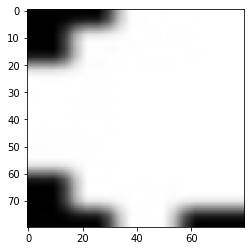

In [77]:
plt.imshow(data['data'][10])

In [78]:

for i in range(len(data['data'])):
    data['data'][i]=preprocess_seg(data['data'][i])

In [79]:
data['data'][0].shape

(80, 80)

In [80]:
from collections import Counter
import numpy as np
data = data
 
print('number of samples: ', len(data['data']))
print('keys: ', list(data.keys()))
print('description: ', data['description'])
print('image shape: ', data['data'][0].shape)
print('labels:', np.unique(data['label']))
 
Counter(data['label'])

number of samples:  3438
keys:  ['description', 'label', 'filename', 'data', 'feature']
description:  resized (80x80)animal images in rgb
image shape:  (80, 80)
labels: ['0' '1' '2' '4' '5' '6' '7' '8' '9' 'A' 'B' 'C' 'D' 'H' 'J' 'K' 'L' 'M'
 'N' 'Q' 'S' 'T' 'V' 'X' 'Y' 'Z']


Counter({'0': 103,
         '1': 201,
         '2': 201,
         '4': 201,
         '5': 201,
         '6': 201,
         '7': 201,
         '8': 201,
         '9': 201,
         'A': 104,
         'B': 101,
         'C': 101,
         'D': 101,
         'H': 101,
         'J': 101,
         'K': 101,
         'L': 101,
         'M': 101,
         'N': 101,
         'Q': 101,
         'S': 101,
         'T': 101,
         'V': 101,
         'X': 101,
         'Y': 101,
         'Z': 108})

In [81]:
data['data'][0].shape

(80, 80)

In [82]:
lbp=[]
for i in range(len(data['data'])):
    height, width= data['data'][i].shape
    imglbp= np.zeros((height, width),np.uint8)
    for j in range(0, height):
        for k in range(0, width):
            imglbp[j, k] = lbp_calculated_pixel(data['data'][i], j, k)
            h,w=imglbp.shape
    featurevector=np.reshape(imglbp,(1,h*w))
    data['data'][i]=featurevector    
    


In [171]:
X = np.array(data['data'])
y = np.array(data['label'])

C:\Users\hamid\AppData\Local\Temp/ipykernel_13260/1180732089.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array(data['data'])


In [138]:
import sklearn
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)

In [139]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier();

In [140]:
print("Numbero of tarin Data : ",X_train.shape)
print("Numbero of test Data : ",X_test.shape)
print("Numbero of tarin lbl : ",y_train.shape)
print("Numbero of tarin lbl : ",y_test.shape)

Numbero of tarin Data :  (2750, 80, 80)
Numbero of test Data :  (688, 80, 80)
Numbero of tarin lbl :  (2750,)
Numbero of tarin lbl :  (688,)
